In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Week3/LG.csv')
df1=df.reset_index()['Close']
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
pip install pandas scikit-learn

In [ ]:
from sklearn.utils import Bunch

In [51]:
X = df[['High','Open','Low']].values
y = df['Close'].values

# Tạo đối tượng Bunch
dataset = Bunch(data=X, target=y, feature_names=['High','Open','Low'], target_names=['Close'])

# In nội dung của Bunch để kiểm tra
print(type(dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [52]:
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
reg = ensemble.GradientBoostingRegressor()

# Huấn luyện mô hình
reg.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = reg.predict(X_train)
y_pred = reg.predict(X_test)


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 8557.895540801896
Mean Squared Error (MSE): 142466006.00410017
R-squared (R2): 0.8529348733456701


In [45]:
type(X_test)


numpy.ndarray

In [54]:
#Dự đoán 30 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

0 day input [71800 70800 70800]
0 day output [78912.28734817]
1 day input [70800.         70800.         78912.28734817]
1 day output [80594.95914881]
2 day input [70800.         78912.28734817 80594.95914881]
2 day output [81162.79136333]
3 day input [78912.28734817 80594.95914881 81162.79136333]
3 day output [80800.37365071]
4 day input [80594.95914881 81162.79136333 80800.37365071]
4 day output [80491.63402871]
5 day input [81162.79136333 80800.37365071 80491.63402871]
5 day output [80832.8719701]
6 day input [80800.37365071 80491.63402871 80832.8719701 ]
6 day output [80832.8719701]
7 day input [80491.63402871 80832.8719701  80832.8719701 ]
7 day output [80491.63402871]
8 day input [80832.8719701  80832.8719701  80491.63402871]
8 day output [80832.8719701]
9 day input [80832.8719701  80491.63402871 80832.8719701 ]
9 day output [80832.8719701]
10 day input [80491.63402871 80832.8719701  80832.8719701 ]
10 day output [80491.63402871]
11 day input [80832.8719701  80832.8719701  80491.

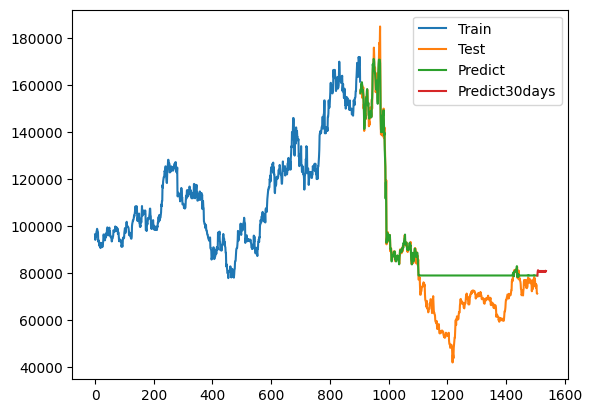

In [55]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

In [56]:
#Dự đoán 60 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

0 day input [71800 70800 70800]
0 day output [78912.28734817]
1 day input [70800.         70800.         78912.28734817]
1 day output [80594.95914881]
2 day input [70800.         78912.28734817 80594.95914881]
2 day output [81162.79136333]
3 day input [78912.28734817 80594.95914881 81162.79136333]
3 day output [80800.37365071]
4 day input [80594.95914881 81162.79136333 80800.37365071]
4 day output [80491.63402871]
5 day input [81162.79136333 80800.37365071 80491.63402871]
5 day output [80832.8719701]
6 day input [80800.37365071 80491.63402871 80832.8719701 ]
6 day output [80832.8719701]
7 day input [80491.63402871 80832.8719701  80832.8719701 ]
7 day output [80491.63402871]
8 day input [80832.8719701  80832.8719701  80491.63402871]
8 day output [80832.8719701]
9 day input [80832.8719701  80491.63402871 80832.8719701 ]
9 day output [80832.8719701]
10 day input [80491.63402871 80832.8719701  80832.8719701 ]
10 day output [80491.63402871]
11 day input [80832.8719701  80832.8719701  80491.

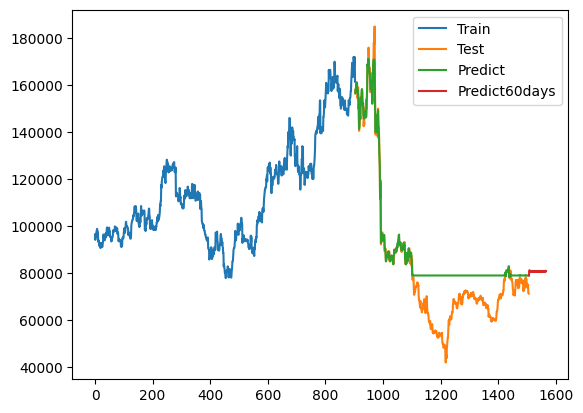

In [57]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

In [58]:
#Dự đoán 90 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

0 day input [71800 70800 70800]
0 day output [78912.28734817]
1 day input [70800.         70800.         78912.28734817]
1 day output [80594.95914881]
2 day input [70800.         78912.28734817 80594.95914881]
2 day output [81162.79136333]
3 day input [78912.28734817 80594.95914881 81162.79136333]
3 day output [80800.37365071]
4 day input [80594.95914881 81162.79136333 80800.37365071]
4 day output [80491.63402871]
5 day input [81162.79136333 80800.37365071 80491.63402871]
5 day output [80832.8719701]
6 day input [80800.37365071 80491.63402871 80832.8719701 ]
6 day output [80832.8719701]
7 day input [80491.63402871 80832.8719701  80832.8719701 ]
7 day output [80491.63402871]
8 day input [80832.8719701  80832.8719701  80491.63402871]
8 day output [80832.8719701]
9 day input [80832.8719701  80491.63402871 80832.8719701 ]
9 day output [80832.8719701]
10 day input [80491.63402871 80832.8719701  80832.8719701 ]
10 day output [80491.63402871]
11 day input [80832.8719701  80832.8719701  80491.

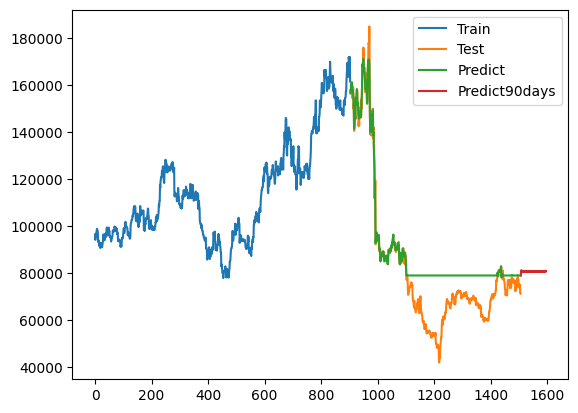

In [61]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()